# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [8]:
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
print("Accuray scores mean: ", np.mean(scores))

[0.96666667 1.         0.86666667 0.86666667 1.        ]
Accuray scores mean:  0.9400000000000001


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [14]:
from sklearn import neighbors

n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
# uniform ==  ogni vicino da un equo contributo alla predizione del datapoit
# distance == ogni vicino da un contributo pari alla sua distanza dal datapoit. I punti più vicini influenzano di più il processo decisionale. 
# se il dataset è uniforme conviene uniform, se invece ha desità variabile conviene distance 

clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print("Classification score of k-nn with uniform weighting")
print("Cross validation average accuracy score: ", np.mean(scores))
print()

# shows the model predictions  
number_ok = 0
number_fail = 0

for i in range(len(iris.target)):
    #print(f"Datapoint {i}: ", iris.data[i,:])
    instance = iris.data[i,:].reshape(1,-1)
    predicted = clf_knn.predict(instance)[0]
    
    #print(f"Reshape in (1,-1) {i}: ", instance) 
    #print(f"Knn prediction on datapoint {i}: ", predicted)
    
    if iris.target[i] == predicted:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        number_ok += 1
    else:
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
        number_fail += 1
    
print("Number ok: ", number_ok)
print("Number fail: ", number_fail)

Classification score of k-nn with uniform weighting
Cross validation average accuracy score:  0.9800000000000001

Number ok:  146
Number fail:  4


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [13]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

number_ok = 0
number_fail = 0
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        number_ok += 1
    else:
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted2]))
        number_fail += 1
    
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print("Cross validation average accuracy score: ", np.mean(scores2))
print()

print("Number ok: ", number_ok)
print("Number fail: ", number_fail)

Classification score of k-nn with distance weighting
Cross validation average accuracy score:  0.9866666666666667

Number ok:  150
Number fail:  0


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

best k=7
best accuracy=0.9666666666666667


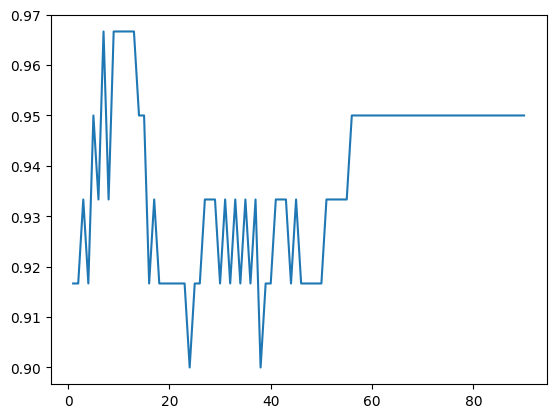

In [15]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy = 0
best_k = 1
A = np.zeros(len(y_train), dtype=float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf_knn3.fit(X_train, y_train)
    index = n_neighbors-1
    A[index] = clf_knn3.score(X_test, y_test)
    
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors
        
    #print("k neighbors="+str(n_neighbors))
    #print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))


import matplotlib.pyplot as plt
plt.yticks(np.arange(0.0,1.0,0.01))
plt.plot(np.arange(1,len(y_train)+1),A)
plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting: uniform
best k = 7
best accuracy = 0.9666666666666667

weighting: distance
best k = 7
best accuracy = 0.9666666666666667



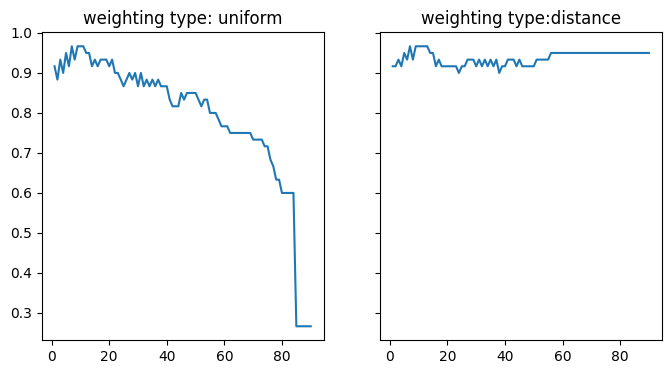

In [19]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  # parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (8,4))
for weight_type in ['uniform','distance']:
    print("weighting: "+str(weight_type))
    A=np.zeros(len(y_train), dtype=float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("best k = "+str(best_k))
    print("best accuracy = "+str(best_accuracy))
    print()
    
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type: ' + str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()

In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


weighting: uniform
best k = 7
best accuracy = 0.9666666666666667

weighting: distance
best k = 7
best accuracy = 0.9666666666666667


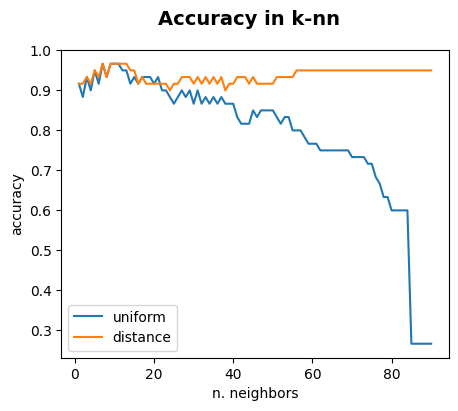

In [29]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure(figsize=(5,4))
fig.suptitle('Accuracy in k-nn', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\nweighting: "+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    #print("\n")
    print("best k = "+str(best_k))
    print("best accuracy = "+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
    
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


## What you have to do: 
1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor
3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  
4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

5. In the following, extend the above exercize on k-nn using a kernel function  
K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).